In [1]:
import os
import sys

sys.path.append(os.path.abspath('..'))

import modules.io as io
import modules.vessel_regression as vessel_regression
import numpy as np
import skimage.filters as filters
import skimage.feature as feature
import matplotlib.pyplot as plt

In [2]:
DATA_KEY    = "TRAIN"
CONFIG_FILE = "../config/googlenet_c30_train300k_aug10_clean.yaml"

config      = io.load_yaml(CONFIG_FILE)

In [ ]:
import factories.dataset_factory as dataset_factory

data    = dataset_factory.get(config, DATA_KEY)

5it [00:00, 42.91it/s]

centering images


7860it [03:03, 42.77it/s]
  0%|          | 185/78166 [00:06<44:06, 29.46it/s] 

outlier


  0%|          | 211/78166 [00:06<42:44, 30.40it/s]

outlier


  1%|          | 730/78166 [00:16<29:52, 43.20it/s]

outlier


  1%|▏         | 984/78166 [00:20<26:26, 48.66it/s]

outlier


  1%|▏         | 1121/78166 [00:22<25:35, 50.19it/s]

outlier


  2%|▏         | 1628/78166 [00:29<23:07, 55.18it/s]

outlier


  3%|▎         | 2190/78166 [00:37<21:37, 58.54it/s]

outlier
outlier


  3%|▎         | 2235/78166 [00:37<21:29, 58.87it/s]

outlier


  3%|▎         | 2329/78166 [00:39<21:20, 59.22it/s]

outlier


  3%|▎         | 2361/78166 [00:39<21:19, 59.24it/s]

outlier


  3%|▎         | 2504/78166 [00:41<21:08, 59.64it/s]

outlier


  3%|▎         | 2665/78166 [00:44<20:50, 60.36it/s]

outlier
outlier


  4%|▎         | 2805/78166 [00:46<20:37, 60.92it/s]

outlier


  4%|▎         | 2926/78166 [00:47<20:26, 61.36it/s]

outlier


  4%|▍         | 3038/78166 [00:49<20:17, 61.73it/s]

outlier


  6%|▌         | 4304/78166 [01:05<18:49, 65.41it/s]

outlier


  6%|▌         | 4492/78166 [01:08<18:36, 65.99it/s]

outlier


  6%|▌         | 4800/78166 [01:12<18:25, 66.37it/s]

outlier
outlier


  6%|▌         | 4821/78166 [01:12<18:25, 66.32it/s]

outlier


  6%|▌         | 4842/78166 [01:13<18:26, 66.28it/s]

outlier
outlier
outlier


  6%|▋         | 4896/78166 [01:13<18:23, 66.40it/s]

outlier


  6%|▋         | 4912/78166 [01:13<18:23, 66.39it/s]

outlier


  6%|▋         | 4930/78166 [01:14<18:22, 66.45it/s]

outlier
outlier


  6%|▋         | 4973/78166 [01:14<18:20, 66.51it/s]

outlier


  6%|▋         | 5027/78166 [01:15<18:16, 66.68it/s]

outlier
outlier


  6%|▋         | 5063/78166 [01:15<18:14, 66.79it/s]

outlier
outlier


  7%|▋         | 5088/78166 [01:16<18:14, 66.77it/s]

outlier


  7%|▋         | 5114/78166 [01:16<18:13, 66.82it/s]

outlier
outlier
outlier


  7%|▋         | 5148/78166 [01:17<18:12, 66.84it/s]

outlier
outlier
outlier
outlier


  7%|▋         | 5175/78166 [01:17<18:10, 66.92it/s]

outlier


  7%|▋         | 5220/78166 [01:17<18:07, 67.05it/s]

outlier
outlier


  7%|▋         | 5274/78166 [01:18<18:04, 67.21it/s]

outlier


  7%|▋         | 5345/78166 [01:19<18:01, 67.31it/s]

outlier


  8%|▊         | 6008/78166 [01:28<17:47, 67.61it/s]

outlier
outlier


  8%|▊         | 6026/78166 [01:29<17:46, 67.65it/s]

outlier
outlier


  8%|▊         | 6053/78166 [01:29<17:44, 67.72it/s]

outlier
outlier


  8%|▊         | 6125/78166 [01:30<17:40, 67.90it/s]

outlier


  8%|▊         | 6188/78166 [01:30<17:37, 68.05it/s]

outlier
outlier


  8%|▊         | 6233/78166 [01:31<17:35, 68.15it/s]

outlier
outlier


  8%|▊         | 6258/78166 [01:31<17:35, 68.13it/s]

outlier
outlier


  8%|▊         | 6301/78166 [01:32<17:34, 68.15it/s]

outlier


  8%|▊         | 6470/78166 [01:34<17:27, 68.43it/s]

outlier


  8%|▊         | 6479/78166 [01:34<17:27, 68.45it/s]

outlier


  8%|▊         | 6505/78166 [01:35<17:27, 68.43it/s]

outlier


  8%|▊         | 6581/78166 [01:36<17:25, 68.46it/s]

outlier


  9%|▉         | 7062/78166 [01:42<17:10, 69.01it/s]

outlier


  9%|▉         | 7361/78166 [01:46<17:02, 69.24it/s]

outlier


 10%|▉         | 7532/78166 [01:48<16:55, 69.56it/s]

outlier


 10%|█         | 7944/78166 [01:53<16:41, 70.14it/s]

outlier
outlier


 10%|█         | 7971/78166 [01:53<16:40, 70.18it/s]

outlier
outlier
outlier


 10%|█         | 8007/78166 [01:53<16:38, 70.24it/s]

outlier


 11%|█         | 8554/78166 [02:00<16:20, 70.99it/s]

outlier


 12%|█▏        | 9567/78166 [02:12<15:49, 72.26it/s]

outlier


 13%|█▎        | 10098/78166 [02:18<15:34, 72.85it/s]

outlier


 13%|█▎        | 10152/78166 [02:19<15:33, 72.89it/s]

outlier


 13%|█▎        | 10188/78166 [02:19<15:32, 72.94it/s]

outlier


 13%|█▎        | 10491/78166 [02:23<15:25, 73.16it/s]

outlier
outlier


 14%|█▎        | 10563/78166 [02:24<15:23, 73.24it/s]

outlier


 14%|█▎        | 10714/78166 [02:26<15:20, 73.28it/s]

outlier


 14%|█▍        | 10749/78166 [02:26<15:19, 73.30it/s]

outlier


 15%|█▌        | 11906/78166 [02:40<14:52, 74.26it/s]

outlier


 15%|█▌        | 11941/78166 [02:40<14:52, 74.24it/s]

outlier


 15%|█▌        | 12071/78166 [02:42<14:50, 74.26it/s]

outlier


 16%|█▌        | 12124/78166 [02:43<14:49, 74.24it/s]

outlier


 16%|█▌        | 12302/78166 [02:45<14:45, 74.37it/s]

outlier
outlier


 16%|█▌        | 12595/78166 [02:49<14:40, 74.44it/s]

outlier


 16%|█▌        | 12612/78166 [02:49<14:40, 74.45it/s]

outlier
outlier
outlier


 16%|█▌        | 12639/78166 [02:49<14:39, 74.47it/s]

outlier


 16%|█▌        | 12674/78166 [02:50<14:39, 74.46it/s]

outlier
outlier
outlier


 16%|█▌        | 12692/78166 [02:50<14:39, 74.47it/s]

outlier


 16%|█▋        | 12727/78166 [02:50<14:38, 74.46it/s]

outlier
outlier


 16%|█▋        | 12761/78166 [02:51<14:38, 74.47it/s]

outlier


 16%|█▋        | 12832/78166 [02:52<14:37, 74.48it/s]

outlier


 16%|█▋        | 12873/78166 [02:52<14:36, 74.47it/s]

outlier
outlier
outlier


 16%|█▋        | 12890/78166 [02:53<14:36, 74.48it/s]

outlier


 17%|█▋        | 12933/78166 [02:53<14:35, 74.48it/s]

outlier


 17%|█▋        | 12951/78166 [02:53<14:35, 74.49it/s]

outlier
outlier


 17%|█▋        | 12985/78166 [02:54<14:35, 74.48it/s]

outlier


 17%|█▋        | 13048/78166 [02:55<14:33, 74.53it/s]

outlier
outlier
outlier


 17%|█▋        | 13075/78166 [02:55<14:33, 74.53it/s]

outlier


 18%|█▊        | 13854/78166 [03:04<14:17, 75.02it/s]

outlier
outlier
outlier


 18%|█▊        | 13899/78166 [03:05<14:16, 75.06it/s]

outlier
outlier


 18%|█▊        | 14043/78166 [03:06<14:13, 75.17it/s]

outlier
outlier


 18%|█▊        | 14115/78166 [03:07<14:11, 75.22it/s]

outlier


 18%|█▊        | 14213/78166 [03:08<14:09, 75.25it/s]

outlier


 18%|█▊        | 14390/78166 [03:11<14:07, 75.26it/s]

outlier


 19%|█▉        | 14822/78166 [03:16<14:01, 75.31it/s]

outlier
outlier


 19%|█▉        | 14857/78166 [03:17<14:00, 75.29it/s]

outlier


 19%|█▉        | 15157/78166 [03:21<13:56, 75.34it/s]

outlier
outlier


 20%|█▉        | 15337/78166 [03:23<13:52, 75.44it/s]

outlier
outlier


 20%|██        | 15780/78166 [03:28<13:45, 75.55it/s]

outlier
outlier
outlier
outlier


 20%|██        | 15825/78166 [03:29<13:44, 75.58it/s]

outlier
outlier


 22%|██▏       | 16844/78166 [03:41<13:26, 76.02it/s]

outlier


 22%|██▏       | 16969/78166 [03:43<13:24, 76.06it/s]

outlier


 22%|██▏       | 17090/78166 [03:44<13:23, 76.06it/s]

outlier


 22%|██▏       | 17339/78166 [03:47<13:19, 76.12it/s]

outlier


 22%|██▏       | 17402/78166 [03:48<13:18, 76.12it/s]

outlier


 22%|██▏       | 17491/78166 [03:49<13:16, 76.14it/s]

outlier


 22%|██▏       | 17518/78166 [03:50<13:16, 76.16it/s]

outlier


 23%|██▎       | 17679/78166 [03:51<13:13, 76.21it/s]

outlier


 23%|██▎       | 17841/78166 [03:53<13:10, 76.28it/s]

outlier
outlier
outlier


 23%|██▎       | 17886/78166 [03:54<13:09, 76.31it/s]

outlier


 23%|██▎       | 17940/78166 [03:55<13:09, 76.30it/s]

outlier


 23%|██▎       | 17967/78166 [03:55<13:08, 76.32it/s]

outlier


 23%|██▎       | 17992/78166 [03:55<13:08, 76.29it/s]

outlier
outlier
outlier
outlier


 23%|██▎       | 18085/78166 [03:57<13:07, 76.28it/s]

outlier


 24%|██▎       | 18540/78166 [04:03<13:02, 76.19it/s]

outlier
outlier


 24%|██▎       | 18555/78166 [04:03<13:02, 76.18it/s]

outlier
outlier


 24%|██▍       | 18671/78166 [04:05<13:00, 76.21it/s]

outlier


 25%|██▍       | 19339/78166 [04:13<12:50, 76.37it/s]

outlier


 25%|██▌       | 19724/78166 [04:17<12:44, 76.49it/s]

outlier
outlier


 25%|██▌       | 19885/78166 [04:19<12:41, 76.55it/s]

outlier


 26%|██▌       | 20119/78166 [04:22<12:37, 76.65it/s]

outlier
outlier
outlier


 26%|██▌       | 20326/78166 [04:24<12:33, 76.74it/s]

outlier


 26%|██▌       | 20451/78166 [04:26<12:31, 76.76it/s]

outlier
outlier
outlier


 26%|██▌       | 20487/78166 [04:26<12:31, 76.77it/s]

outlier


 26%|██▋       | 20523/78166 [04:27<12:30, 76.78it/s]

outlier
outlier
outlier


 26%|██▋       | 20540/78166 [04:27<12:30, 76.76it/s]

outlier
outlier


 26%|██▋       | 20567/78166 [04:27<12:30, 76.77it/s]

outlier


 26%|██▋       | 20602/78166 [04:28<12:29, 76.76it/s]

outlier
outlier


 26%|██▋       | 20709/78166 [04:29<12:28, 76.78it/s]

outlier
outlier


 27%|██▋       | 20745/78166 [04:30<12:27, 76.80it/s]

outlier
outlier
outlier
outlier


 27%|██▋       | 20790/78166 [04:30<12:27, 76.80it/s]

outlier


 27%|██▋       | 20884/78166 [04:32<12:26, 76.77it/s]

outlier
outlier


 27%|██▋       | 20911/78166 [04:32<12:25, 76.78it/s]

outlier
outlier


 27%|██▋       | 21136/78166 [04:34<12:21, 76.86it/s]

outlier


 28%|██▊       | 21607/78166 [04:41<12:15, 76.87it/s]

outlier


 28%|██▊       | 21660/78166 [04:41<12:15, 76.88it/s]

outlier
outlier


 28%|██▊       | 21677/78166 [04:42<12:14, 76.86it/s]

outlier
outlier


 28%|██▊       | 21702/78166 [04:42<12:14, 76.85it/s]

outlier


 28%|██▊       | 21881/78166 [04:44<12:12, 76.89it/s]

outlier


 28%|██▊       | 21935/78166 [04:45<12:11, 76.91it/s]

outlier


 28%|██▊       | 22105/78166 [04:47<12:08, 76.93it/s]

outlier


 28%|██▊       | 22123/78166 [04:47<12:08, 76.93it/s]

outlier
outlier
outlier


 28%|██▊       | 22158/78166 [04:48<12:08, 76.92it/s]

outlier


 28%|██▊       | 22209/78166 [04:48<12:07, 76.90it/s]

outlier
outlier


 29%|██▉       | 22996/78166 [04:58<11:56, 76.98it/s]

outlier


 30%|██▉       | 23140/78166 [05:00<11:54, 77.04it/s]

outlier


 30%|███       | 23571/78166 [05:05<11:47, 77.16it/s]

outlier
outlier


 30%|███       | 23598/78166 [05:05<11:47, 77.17it/s]

outlier
outlier


 30%|███       | 23625/78166 [05:06<11:46, 77.18it/s]

outlier


 30%|███       | 23652/78166 [05:06<11:46, 77.17it/s]

outlier


 31%|███       | 24100/78166 [05:12<11:40, 77.18it/s]

outlier


 31%|███       | 24144/78166 [05:12<11:39, 77.18it/s]

outlier


 31%|███       | 24353/78166 [05:15<11:37, 77.19it/s]

outlier


 31%|███▏      | 24432/78166 [05:16<11:36, 77.18it/s]

outlier


 32%|███▏      | 24835/78166 [05:22<11:32, 77.04it/s]

outlier


 32%|███▏      | 25067/78166 [05:25<11:28, 77.07it/s]

outlier


 32%|███▏      | 25085/78166 [05:25<11:28, 77.08it/s]

outlier


 32%|███▏      | 25174/78166 [05:26<11:27, 77.08it/s]

outlier


 32%|███▏      | 25281/78166 [05:27<11:25, 77.10it/s]

outlier


 33%|███▎      | 25632/78166 [05:31<11:20, 77.21it/s]

outlier


 33%|███▎      | 25649/78166 [05:32<11:20, 77.19it/s]

outlier


 33%|███▎      | 25727/78166 [05:33<11:19, 77.17it/s]

outlier
outlier


 33%|███▎      | 25754/78166 [05:33<11:19, 77.18it/s]

outlier
outlier
outlier
outlier


 33%|███▎      | 25780/78166 [05:34<11:18, 77.16it/s]

outlier


 33%|███▎      | 25813/78166 [05:34<11:18, 77.15it/s]

outlier
outlier


 33%|███▎      | 26071/78166 [05:37<11:15, 77.14it/s]

outlier


 34%|███▎      | 26251/78166 [05:40<11:12, 77.20it/s]

outlier


 34%|███▎      | 26358/78166 [05:41<11:10, 77.21it/s]

outlier
outlier


 34%|███▍      | 26394/78166 [05:41<11:10, 77.22it/s]

outlier


 34%|███▍      | 26573/78166 [05:43<11:07, 77.27it/s]

outlier


 34%|███▍      | 26937/78166 [05:48<11:02, 77.31it/s]

outlier


 35%|███▌      | 27541/78166 [05:55<10:54, 77.40it/s]

outlier


 35%|███▌      | 27692/78166 [05:57<10:52, 77.40it/s]

outlier


 36%|███▌      | 27764/78166 [05:58<10:50, 77.43it/s]

outlier


 36%|███▌      | 27942/78166 [06:00<10:48, 77.44it/s]

outlier
outlier


 36%|███▌      | 28253/78166 [06:04<10:44, 77.49it/s]

outlier
outlier
outlier
outlier


 36%|███▌      | 28289/78166 [06:05<10:43, 77.50it/s]

outlier
outlier
outlier


 36%|███▌      | 28306/78166 [06:05<10:43, 77.48it/s]

outlier


 36%|███▋      | 28460/78166 [06:07<10:41, 77.43it/s]

outlier


 36%|███▋      | 28513/78166 [06:08<10:41, 77.42it/s]

outlier
outlier


 36%|███▋      | 28530/78166 [06:08<10:41, 77.41it/s]

outlier


 37%|███▋      | 28545/78166 [06:08<10:41, 77.39it/s]

outlier
outlier


 37%|███▋      | 28589/78166 [06:09<10:40, 77.40it/s]

outlier
outlier
outlier


 37%|███▋      | 28616/78166 [06:09<10:40, 77.41it/s]

outlier


 37%|███▋      | 28688/78166 [06:10<10:38, 77.43it/s]

outlier


 37%|███▋      | 28706/78166 [06:10<10:38, 77.44it/s]

outlier
outlier


 38%|███▊      | 29454/78166 [06:20<10:28, 77.48it/s]

outlier


 38%|███▊      | 29481/78166 [06:20<10:28, 77.48it/s]

outlier
outlier


 38%|███▊      | 29508/78166 [06:20<10:27, 77.49it/s]

outlier
outlier
outlier


 38%|███▊      | 29579/78166 [06:21<10:26, 77.49it/s]

outlier


 38%|███▊      | 29606/78166 [06:22<10:26, 77.50it/s]

outlier


 38%|███▊      | 29650/78166 [06:22<10:26, 77.49it/s]

outlier
outlier


 38%|███▊      | 29695/78166 [06:23<10:25, 77.50it/s]

outlier


 38%|███▊      | 29740/78166 [06:23<10:24, 77.51it/s]

outlier


 38%|███▊      | 29766/78166 [06:24<10:24, 77.48it/s]

outlier
outlier


 38%|███▊      | 29883/78166 [06:25<10:22, 77.51it/s]

outlier


 38%|███▊      | 29919/78166 [06:25<10:22, 77.53it/s]

outlier


 38%|███▊      | 29981/78166 [06:26<10:21, 77.53it/s]

outlier


 39%|███▉      | 30498/78166 [06:33<10:14, 77.59it/s]

outlier


 39%|███▉      | 30714/78166 [06:35<10:11, 77.57it/s]

outlier


 39%|███▉      | 30793/78166 [06:37<10:10, 77.56it/s]

outlier


 40%|████      | 31389/78166 [06:44<10:03, 77.57it/s]

outlier
outlier
outlier


 40%|████      | 31424/78166 [06:45<10:02, 77.56it/s]

outlier


 42%|████▏     | 32491/78166 [06:58<09:48, 77.61it/s]

outlier


 42%|████▏     | 32706/78166 [07:01<09:45, 77.63it/s]

outlier


 42%|████▏     | 32903/78166 [07:03<09:42, 77.67it/s]

outlier


 42%|████▏     | 33069/78166 [07:05<09:40, 77.65it/s]

outlier


 43%|████▎     | 33492/78166 [07:11<09:35, 77.63it/s]

outlier


 43%|████▎     | 33570/78166 [07:12<09:34, 77.62it/s]

outlier


 43%|████▎     | 33596/78166 [07:12<09:34, 77.60it/s]

outlier


 43%|████▎     | 33711/78166 [07:14<09:32, 77.61it/s]

outlier


 43%|████▎     | 33822/78166 [07:15<09:31, 77.58it/s]

outlier


 44%|████▎     | 34170/78166 [07:20<09:27, 77.54it/s]

outlier
outlier


 45%|████▌     | 35263/78166 [07:36<09:14, 77.33it/s]

outlier


 46%|████▌     | 35767/78166 [07:42<09:08, 77.34it/s]

outlier


 46%|████▌     | 35881/78166 [07:44<09:06, 77.32it/s]

outlier


 46%|████▌     | 35968/78166 [07:45<09:05, 77.29it/s]

outlier


 46%|████▌     | 36067/78166 [07:46<09:04, 77.31it/s]

outlier
outlier


 46%|████▌     | 36094/78166 [07:46<09:04, 77.31it/s]

outlier
outlier


 46%|████▋     | 36155/78166 [07:47<09:03, 77.31it/s]

outlier


 46%|████▋     | 36173/78166 [07:47<09:03, 77.31it/s]

outlier


 46%|████▋     | 36208/78166 [07:48<09:02, 77.31it/s]

outlier
outlier


 46%|████▋     | 36241/78166 [07:48<09:02, 77.30it/s]

outlier
outlier


 46%|████▋     | 36340/78166 [07:49<09:00, 77.32it/s]

outlier


 47%|████▋     | 36367/78166 [07:50<09:00, 77.33it/s]

outlier
outlier


 47%|████▋     | 36394/78166 [07:50<09:00, 77.34it/s]

outlier
outlier
outlier


 47%|████▋     | 36412/78166 [07:50<08:59, 77.34it/s]

outlier
outlier
outlier


 47%|████▋     | 36438/78166 [07:51<08:59, 77.33it/s]

outlier


 47%|████▋     | 36487/78166 [07:51<08:59, 77.31it/s]

outlier
outlier


 47%|████▋     | 36505/78166 [07:52<08:58, 77.31it/s]

outlier
outlier
outlier
outlier


 47%|████▋     | 36620/78166 [07:53<08:57, 77.30it/s]

outlier


 47%|████▋     | 36727/78166 [07:54<08:55, 77.33it/s]

outlier


 48%|████▊     | 37249/78166 [08:01<08:48, 77.43it/s]

outlier


 48%|████▊     | 37357/78166 [08:02<08:46, 77.46it/s]

outlier
outlier


 48%|████▊     | 37420/78166 [08:02<08:45, 77.48it/s]

outlier


 48%|████▊     | 37474/78166 [08:03<08:45, 77.49it/s]

outlier


 48%|████▊     | 37519/78166 [08:04<08:44, 77.50it/s]

outlier
outlier


 48%|████▊     | 37573/78166 [08:04<08:43, 77.50it/s]

outlier
outlier


 48%|████▊     | 37716/78166 [08:06<08:42, 77.45it/s]

outlier
outlier


 48%|████▊     | 37743/78166 [08:07<08:41, 77.45it/s]

outlier
outlier


 48%|████▊     | 37761/78166 [08:07<08:41, 77.46it/s]

outlier


 50%|█████     | 39096/78166 [08:23<08:23, 77.61it/s]

outlier


 50%|█████     | 39252/78166 [08:25<08:21, 77.58it/s]

outlier


 50%|█████     | 39288/78166 [08:26<08:21, 77.59it/s]

outlier


 51%|█████     | 39744/78166 [08:31<08:14, 77.66it/s]

outlier


 51%|█████▏    | 40076/78166 [08:35<08:10, 77.71it/s]

outlier


 52%|█████▏    | 40928/78166 [08:46<07:59, 77.74it/s]

outlier


 53%|█████▎    | 41352/78166 [08:51<07:53, 77.74it/s]

outlier


 53%|█████▎    | 41370/78166 [08:52<07:53, 77.74it/s]

outlier


 53%|█████▎    | 41397/78166 [08:52<07:52, 77.75it/s]

outlier


 53%|█████▎    | 41460/78166 [08:53<07:52, 77.76it/s]

outlier
outlier


 53%|█████▎    | 41702/78166 [08:56<07:48, 77.79it/s]

outlier


 54%|█████▎    | 41907/78166 [08:58<07:46, 77.81it/s]

outlier


 55%|█████▍    | 42762/78166 [09:10<07:35, 77.72it/s]

outlier


 55%|█████▌    | 43145/78166 [09:14<07:30, 77.75it/s]

outlier


 55%|█████▌    | 43190/78166 [09:15<07:29, 77.76it/s]

outlier


 55%|█████▌    | 43360/78166 [09:17<07:27, 77.77it/s]

outlier


 56%|█████▌    | 43396/78166 [09:17<07:27, 77.78it/s]

outlier


 56%|█████▌    | 43884/78166 [09:24<07:20, 77.78it/s]

outlier
outlier
outlier


 56%|█████▌    | 43902/78166 [09:24<07:20, 77.79it/s]

outlier


 56%|█████▌    | 43927/78166 [09:24<07:20, 77.79it/s]

outlier


 56%|█████▋    | 43990/78166 [09:25<07:19, 77.80it/s]

outlier


 56%|█████▋    | 44008/78166 [09:25<07:19, 77.80it/s]

outlier
outlier
outlier


 56%|█████▋    | 44026/78166 [09:25<07:18, 77.81it/s]

outlier


 56%|█████▋    | 44052/78166 [09:26<07:18, 77.80it/s]

outlier
outlier


 56%|█████▋    | 44123/78166 [09:27<07:17, 77.80it/s]

outlier


 56%|█████▋    | 44141/78166 [09:27<07:17, 77.80it/s]

outlier


 57%|█████▋    | 44180/78166 [09:28<07:16, 77.78it/s]

outlier
outlier


 57%|█████▋    | 44212/78166 [09:28<07:16, 77.77it/s]

outlier
outlier
outlier


 57%|█████▋    | 44237/78166 [09:28<07:16, 77.77it/s]

outlier
outlier
outlier


 57%|█████▋    | 44255/78166 [09:29<07:16, 77.77it/s]

outlier


 57%|█████▋    | 44314/78166 [09:29<07:15, 77.76it/s]

outlier


 57%|█████▋    | 44348/78166 [09:30<07:14, 77.76it/s]

outlier


 57%|█████▋    | 44356/78166 [09:30<07:14, 77.75it/s]

outlier
outlier
outlier


 57%|█████▋    | 44440/78166 [09:31<07:13, 77.74it/s]

outlier


 57%|█████▋    | 44900/78166 [09:37<07:07, 77.73it/s]

failed


 58%|█████▊    | 45077/78166 [09:39<07:05, 77.74it/s]

outlier
outlier


 58%|█████▊    | 45131/78166 [09:40<07:04, 77.75it/s]

outlier
outlier
outlier


 58%|█████▊    | 45148/78166 [09:40<07:04, 77.74it/s]

outlier
outlier
outlier


 58%|█████▊    | 45315/78166 [09:43<07:02, 77.71it/s]

outlier


 58%|█████▊    | 45342/78166 [09:43<07:02, 77.72it/s]

outlier
outlier


 58%|█████▊    | 45396/78166 [09:44<07:01, 77.73it/s]

outlier
outlier
outlier


 58%|█████▊    | 45495/78166 [09:45<07:00, 77.75it/s]

outlier


 58%|█████▊    | 45531/78166 [09:45<06:59, 77.75it/s]

outlier


 58%|█████▊    | 45566/78166 [09:46<06:59, 77.74it/s]

outlier


 59%|█████▊    | 45771/78166 [09:48<06:56, 77.75it/s]

In [4]:
X = data[0]
C = data[1]
N = X.shape[0]
print(X.shape)
print(C.shape)

(239, 160, 160)
(239, 13)


8


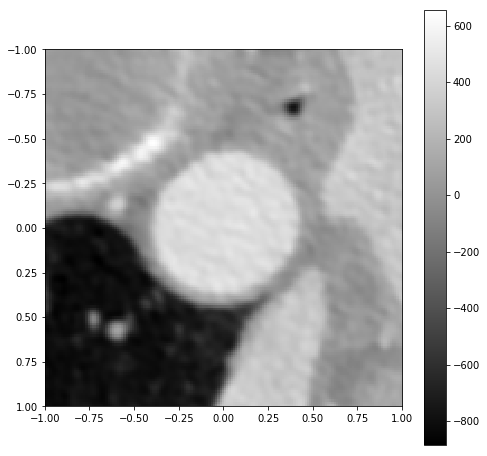

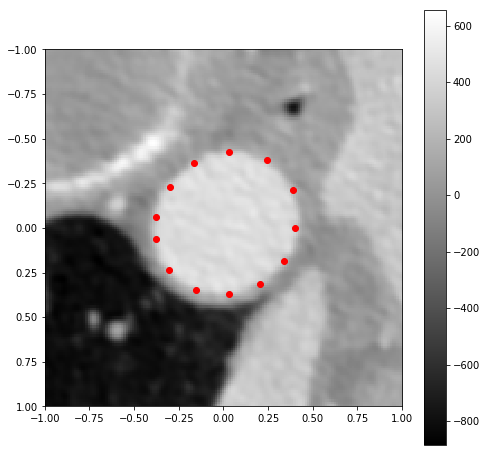

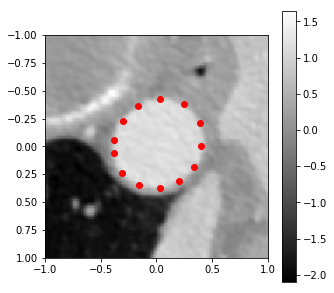

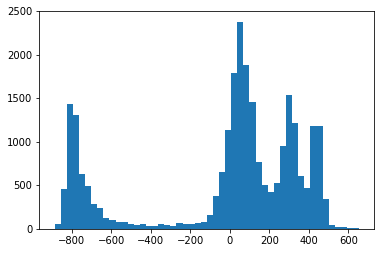

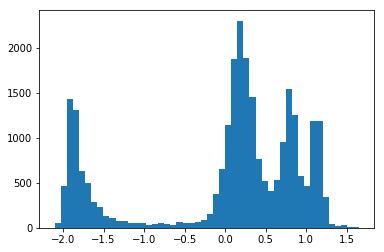

[-2.10263241 -0.08674189  0.23745816  0.35202509  0.66647476  0.82491839
  1.07135918  1.14180566  1.22712146  1.65126288]


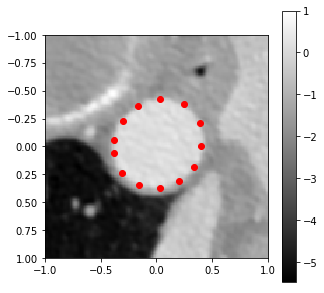

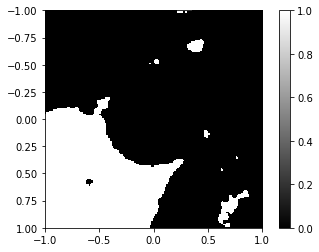

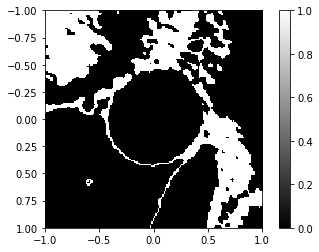

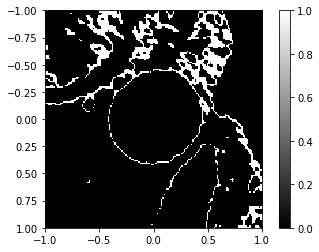

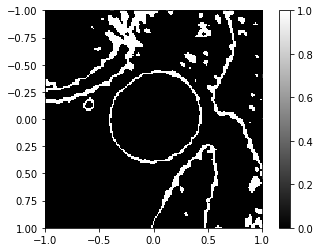

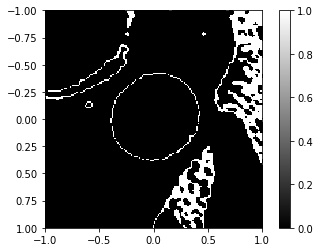

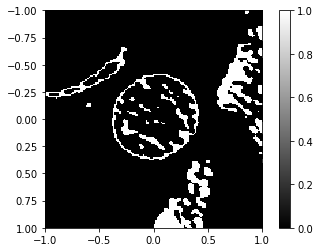

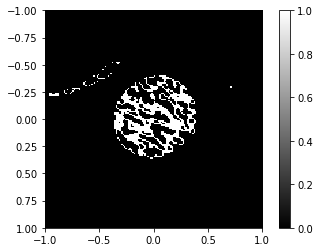

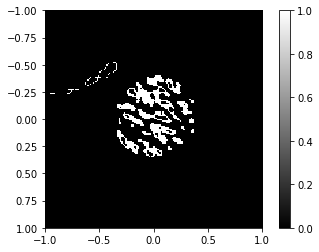

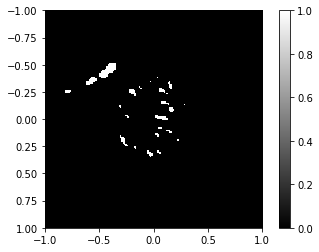

In [14]:
mid = int(X.shape[1]/2)
WIN = 60
OFF = (WIN*2.0/X.shape[1])

i = np.random.randint(N)
print(i)
x = X[i]


xnorm = (1.0*x - np.mean(x))/(np.std(x)+1e-5)

c = C[i]

c = vessel_regression.pred_to_contour(c)

plt.figure(figsize=(8,8))
plt.imshow(x,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(x,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.scatter(c[:,0],c[:,1],color='r')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(xnorm,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.scatter(c[:,0],c[:,1],color='r')
plt.show()

plt.figure()
plt.hist(np.ravel(x), bins=50)
plt.show()
plt.close()

plt.figure()
plt.hist(np.ravel(xnorm), bins=50)
plt.show()
plt.close()

quantiles = np.percentile(np.ravel(xnorm), q=[0, 25, 50, 60, 70, 80, 90, 95, 99, 100])
print(quantiles)

xnorm2 = (1.0*xnorm - quantiles[-4])/(quantiles[-1]-quantiles[-4])

plt.figure(figsize=(5,5))
plt.imshow(xnorm2,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.scatter(c[:,0],c[:,1],color='r')
plt.show()

for i in range(len(quantiles)-1):
    qlow = quantiles[i]
    qhigh = quantiles[i+1]
    
    xthresh = xnorm.copy()
    xthresh[xthresh < qlow] = 0
    xthresh[xthresh > qhigh] = 0
    xthresh[xthresh != 0] = 1
    
    plt.figure()
    plt.imshow(xthresh, cmap='gray',extent=[-1, 1, 1, -1])
    plt.colorbar()
    plt.show()
    plt.close()

38


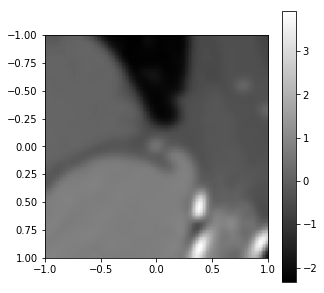

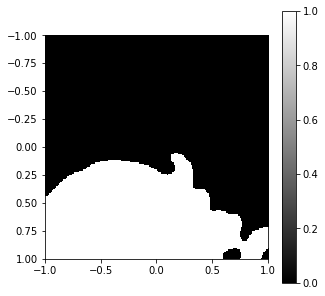

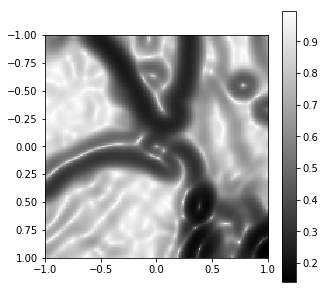

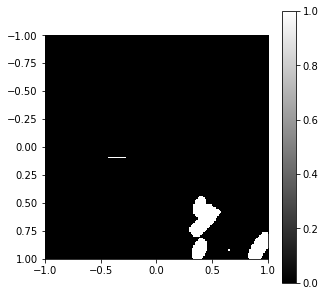

In [6]:
from skimage.segmentation import morphological_geodesic_active_contour, inverse_gaussian_gradient
from scipy.ndimage.morphology import binary_fill_holes

i = np.random.randint(N)
print(i)
x = X[i]

thresh = 0.5

xnorm = (1.0*x - np.mean(x))/(np.std(x)+1e-5)
xnorm = filters.gaussian(xnorm, sigma=3)
y = xnorm.copy()
y[xnorm>thresh]  = 1.0
y[xnorm<=thresh] = 0 
y = binary_fill_holes(y).astype(int)

gimage = inverse_gaussian_gradient(xnorm, sigma=3)

ls = morphological_geodesic_active_contour(gimage, 230, y,
                                           smoothing=1, balloon=-1,
                                           threshold=0.5)

plt.figure(figsize=(5,5))
plt.imshow(xnorm,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(y,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(gimage,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(ls,cmap='gray', extent=[-1, 1, 1, -1])
plt.colorbar()
plt.show()